In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("/content/sales_data_with_discounts.csv")

In [ ]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
df.info() #shows information including types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
df.mean(numeric_only=True)

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [ ]:
df.median(numeric_only=True)

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [ ]:
df['Date'].mode()

,Date
0,01-04-2021
1,02-04-2021
2,03-04-2021
3,04-04-2021
4,05-04-2021
5,06-04-2021
6,07-04-2021
7,08-04-2021
8,09-04-2021
9,10-04-2021


In [ ]:
s_list = df.apply(lambda x: x.mode().tolist())
s_list

,0
Date,"[01-04-2021, 02-04-2021, 03-04-2021, 04-04-202..."
Day,[Thursday]
SKU,"[F01, F02, F03, F04, F05, F06, F07, F08, F09, ..."
City,[C]
Volume,[3]
BU,"[FMCG, Lifestyle, Mobiles]"
Brand,[Jeera]
Model,"[Babaji Cream, Babaji Oil , Babaji Shampoo, Ge..."
Avg Price,"[400, 450, 500, 1300, 8100]"
Total Sales Value,[24300]


In [ ]:
df.std(numeric_only=True)

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


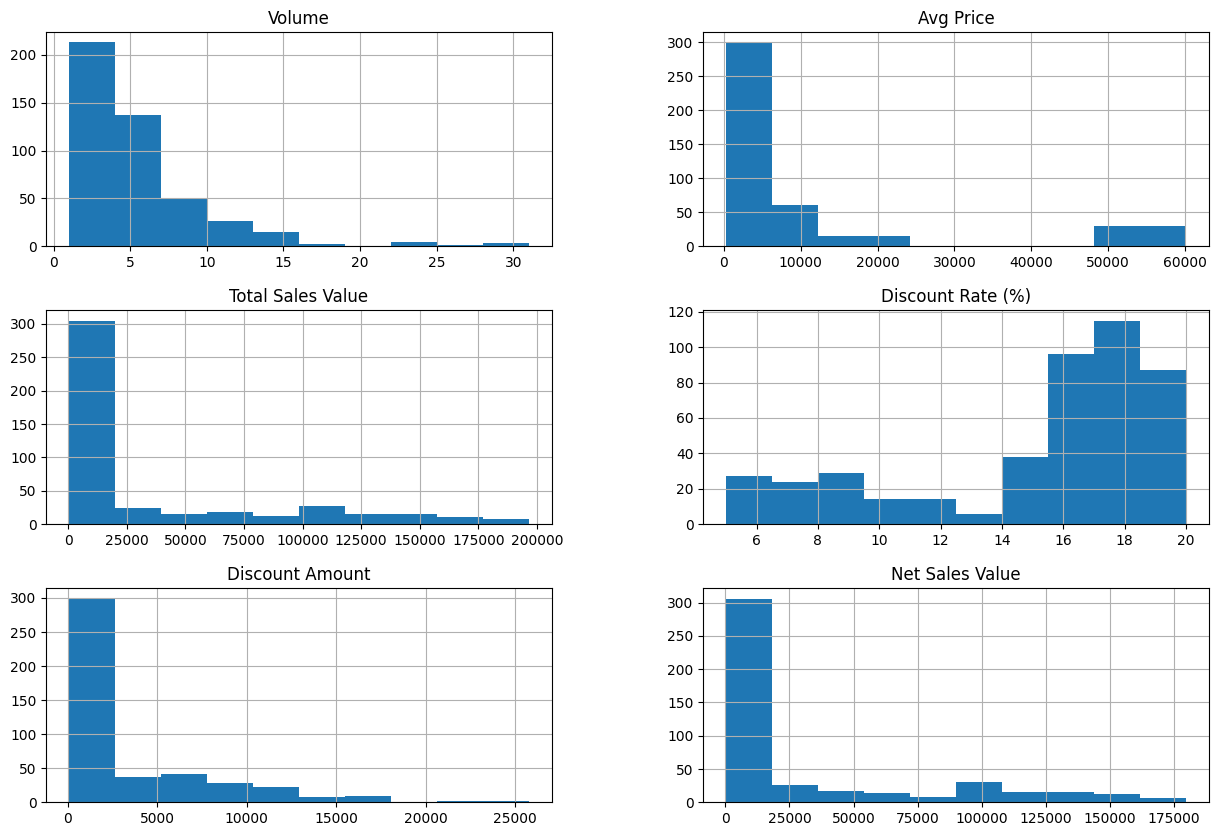

In [ ]:
df.hist(figsize=(15,10))
plt.show()

In [ ]:
df.skew(numeric_only=True)

,0
Volume,2.731724
Avg Price,1.908873
Total Sales Value,1.534729
Discount Rate (%),-1.062294
Discount Amount,1.913038
Net Sales Value,1.540822


In [ ]:
df.kurt(numeric_only=True)

,0
Volume,10.258547
Avg Price,2.075655
Total Sales Value,1.024916
Discount Rate (%),-0.178541
Discount Amount,3.831186
Net Sales Value,1.012468


As we can see in the above histograms:


1. **Volume:-** The distribution is **Right Skewed** and even the skewness value is *>2 therefore outliers are present*.
2. **Avg Price:-** The distribution is **Right Skewed** and even the skewness value is *1.90 which is closer to 2 but is an acceptable value so there is a possibility of outliers* being present.
3. **Total Sales Value:-** The distribution is **Right Skewed** and even the skewness value is *1.53. but outliers* are present as graph has peak for few values and has a longer tail
4. **Discount Rate (%):-** The distribution is **Left Skewed** and even the skewness value is *-1.06 but no outliers* are present.
5. **Discount Amount:-** The distribution is** Right Skewed** and even the skewness value is *1.91 which is closer to 2 but is an acceptable value so there is a possibility of outliers* being present.
6. **Net Sales Value:-** The distribution is **Right Skewed** and even the skewness value is *1.54 but outliers* are present as graph has peak for few values and has a longer tail.

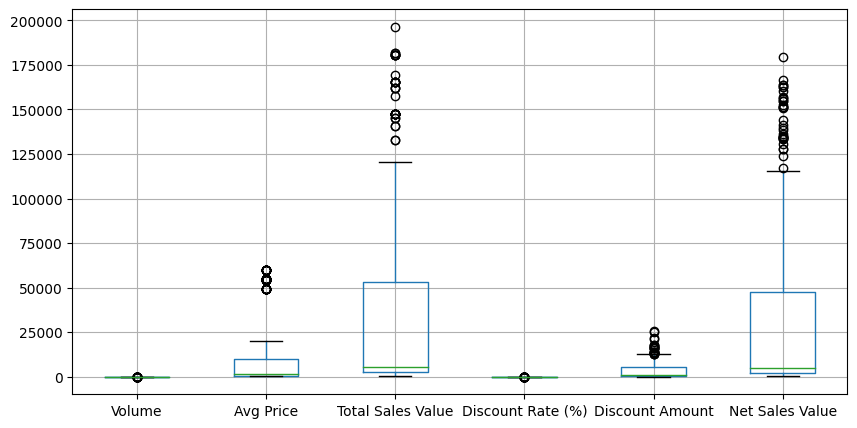

In [ ]:
df.boxplot(figsize=(10,5))
plt.show()

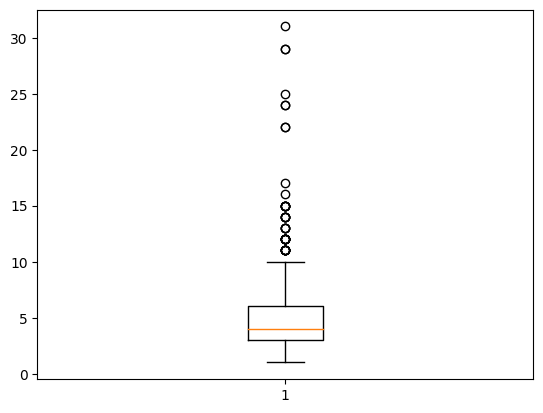

In [ ]:
plt.boxplot(df.Volume)
plt.show()

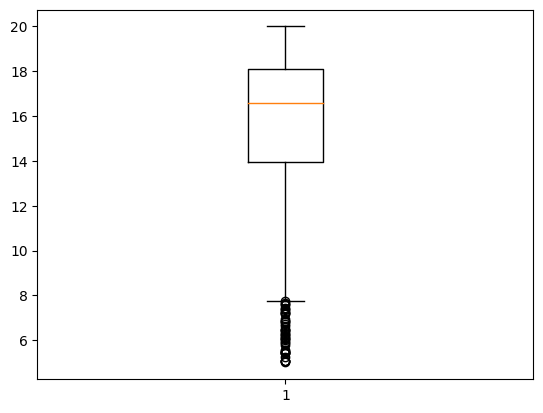

In [ ]:
plt.boxplot(df['Discount Rate (%)'])
plt.show()

In [ ]:
df[['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value']].quantile([0,0.25,0.5,0.75,1])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0.00,1.0,290.0,400.0,5.007822,69.177942,326.974801
0.25,3.0,465.0,2700.0,13.965063,460.459304,2202.208645
0.50,4.0,1450.0,5700.0,16.577766,988.933733,4677.788059
0.75,6.0,10100.0,53200.0,18.114718,5316.495427,47847.912852
1.00,31.0,60100.0,196400.0,19.992407,25738.022194,179507.479049


In [ ]:
iqr1=df['Volume'].quantile(0.75)-df['Volume'].quantile(0.25)
iqr2=df['Avg Price'].quantile(0.75)-df['Avg Price'].quantile(0.25)
iqr3=df['Total Sales Value'].quantile(0.75)-df['Total Sales Value'].quantile(0.25)
iqr4=df['Discount Rate (%)'].quantile(0.75)-df['Discount Rate (%)'].quantile(0.25)
iqr5=df['Discount Amount'].quantile(0.75)-df['Discount Amount'].quantile(0.25)
iqr6=df['Net Sales Value'].quantile(0.75)-df['Net Sales Value'].quantile(0.25)

In [ ]:
a=[iqr1,iqr2,iqr3,iqr4,iqr5,iqr6]
iqr=pd.DataFrame(a,index=['Volume','Avg Price','Total Sales Value','Discount Rate (%)','Discount Amount','Net Sales Value'],columns=['IQR'])
iqr

,IQR
Volume,3.000000
Avg Price,9635.000000
Total Sales Value,50500.000000
Discount Rate (%),4.149656
Discount Amount,4856.036123
Net Sales Value,45645.704206


1. Diff between Quantile 0.75 and 1 for all numeric columns other than Discount
Rate (%) is higher which depicts outliers are present which is also present in Boxplot visualization. The box-plot distribution is right-skewed.
2. Diff between Quantile 0 and 0.25 for Discount Rate (%) is higher which depicts outliers are present which is also present in Boxplot visualization. The box-plot distribution is left-skewed.

In [ ]:
df.describe(include=object)

,Date,Day,SKU,City,BU,Brand,Model
count,450,450,450,450,450,450,450
unique,15,7,30,1,3,9,30
top,01-04-2021,Thursday,M01,C,Mobiles,Jeera,RU-10
freq,30,90,15,450,150,90,15


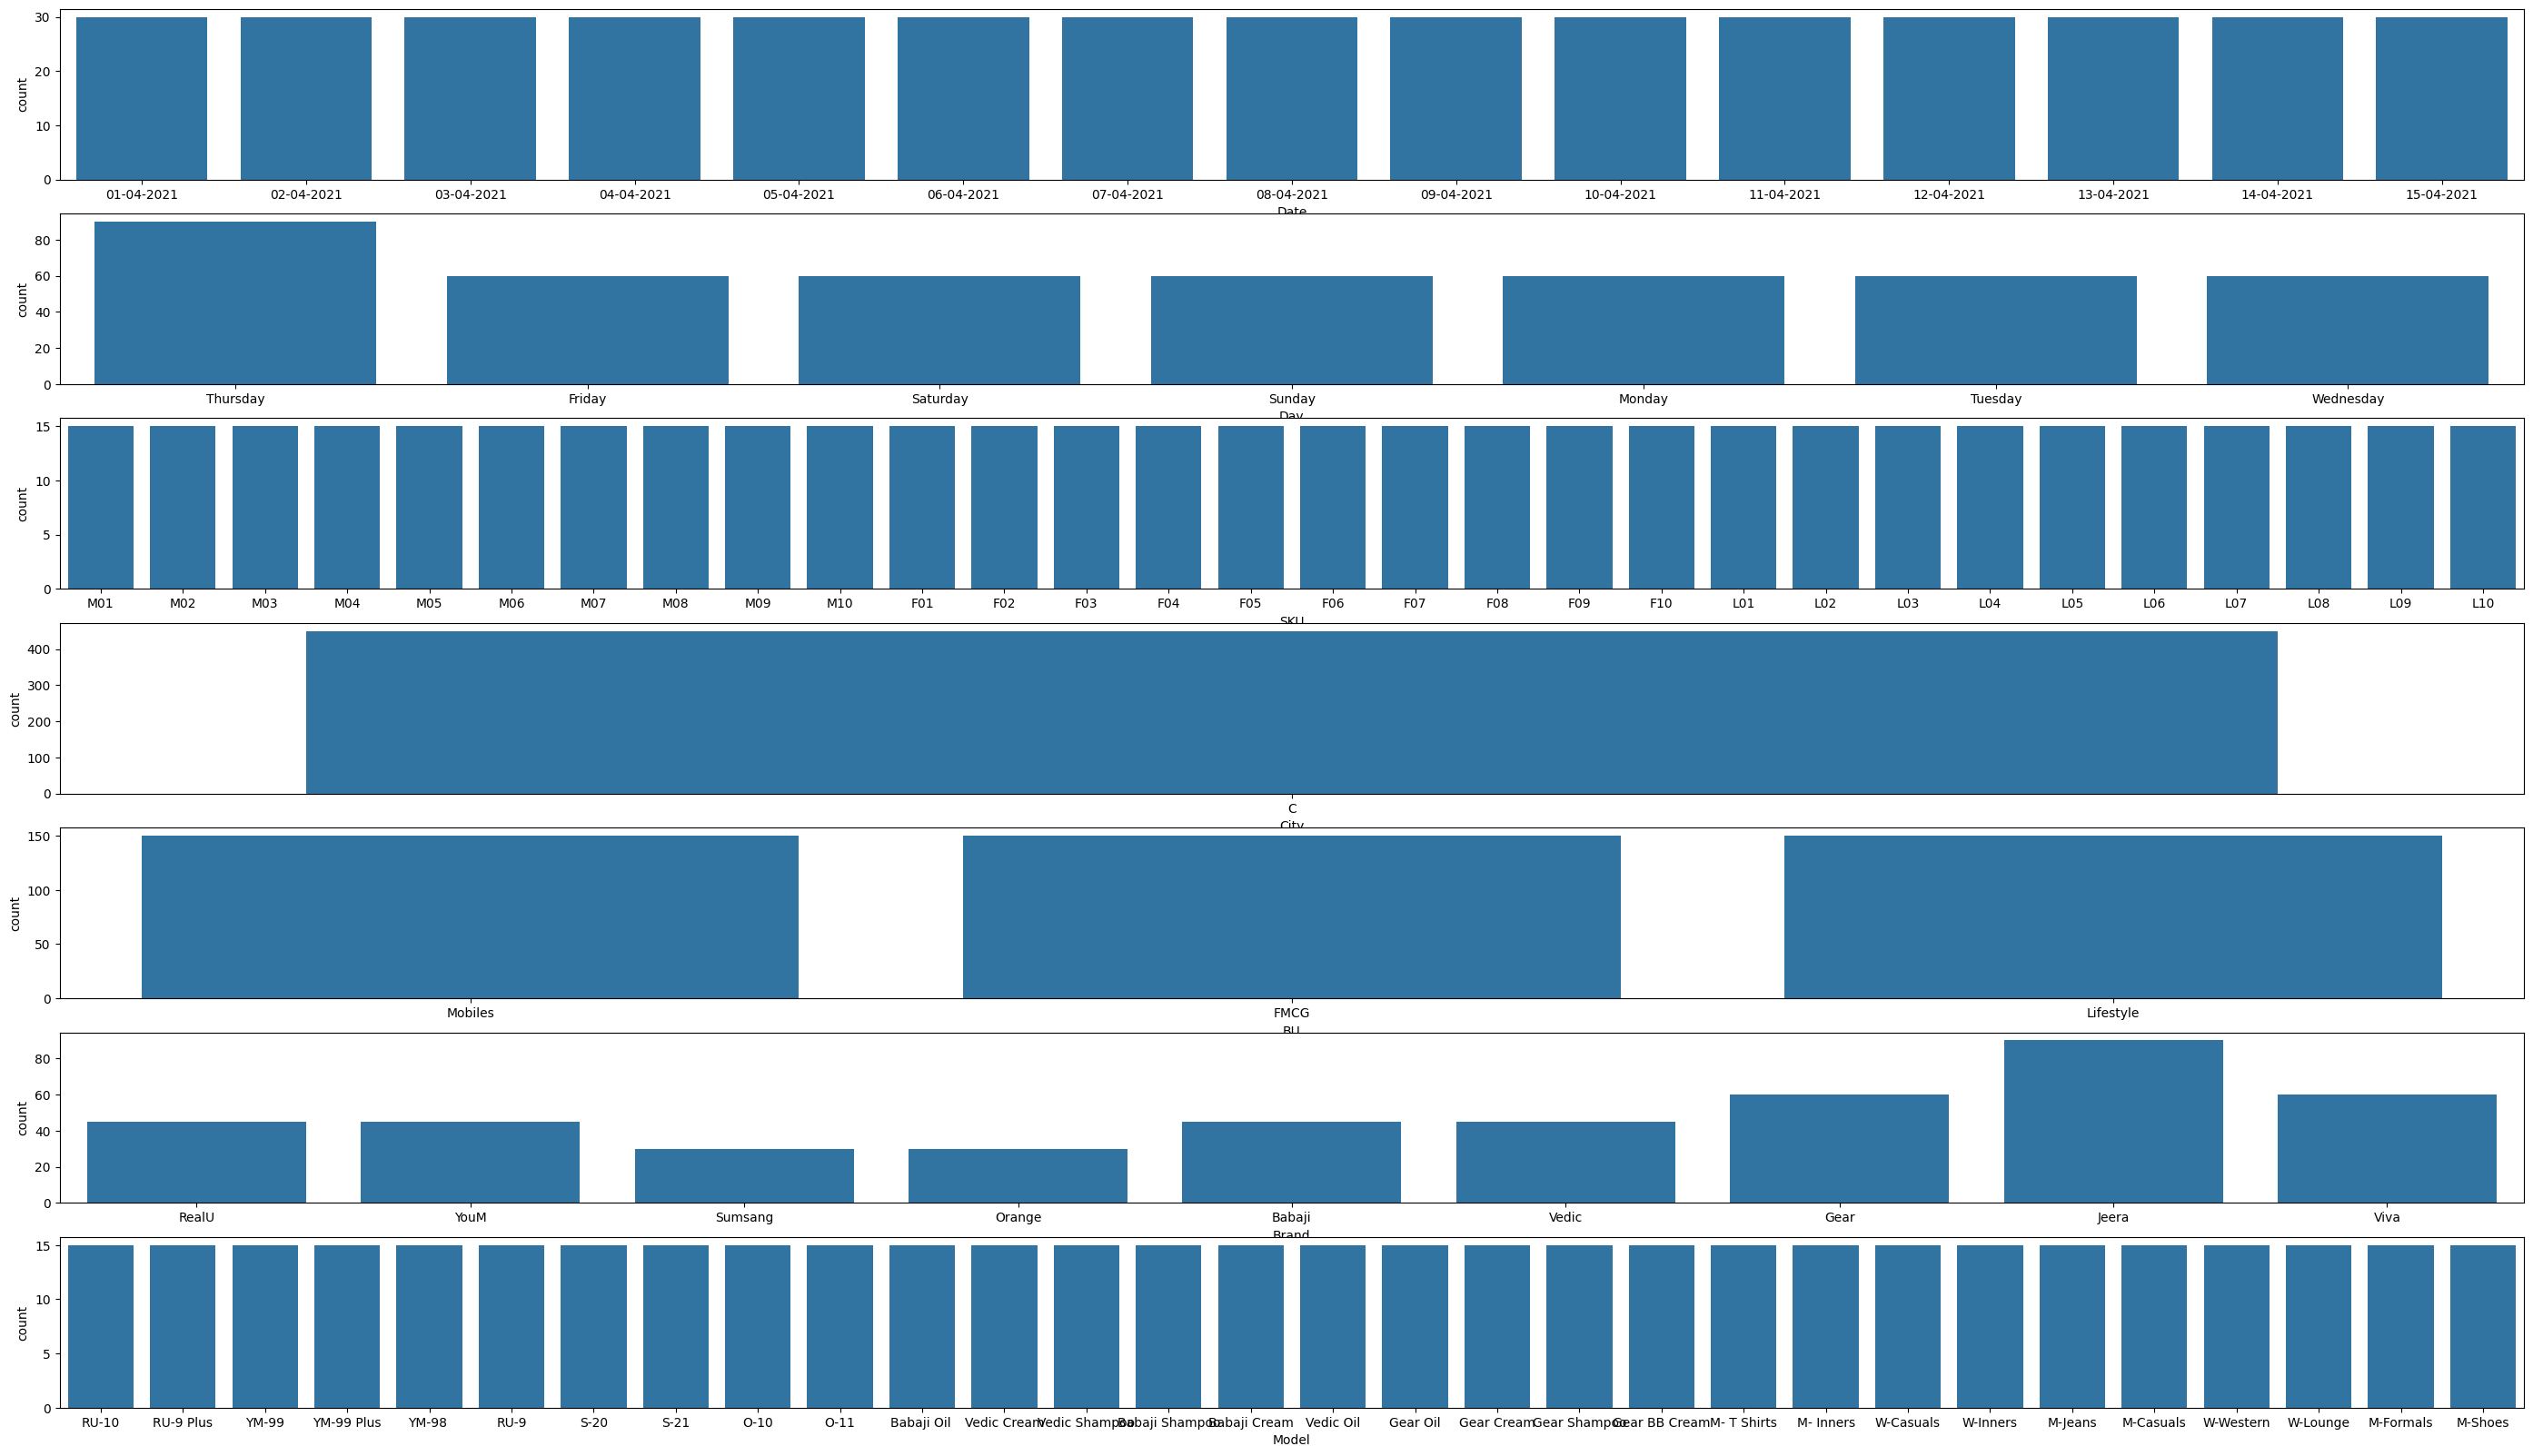

In [ ]:
plt.figure(figsize=(35,20))
plt.subplot(7,1,1)
sns.countplot(x='Date',data=df)

plt.subplot(7,1,2)
sns.countplot(x='Day',data=df)

plt.subplot(7,1,3)
sns.countplot(x='SKU',data=df)

plt.subplot(7,1,4)
sns.countplot(x='City',data=df)

plt.subplot(7,1,5)
sns.countplot(x='BU',data=df)

plt.subplot(7,1,6)
sns.countplot(x='Brand',data=df)

plt.subplot(7,1,7)
sns.countplot(x='Model',data=df)

plt.show()

1. Standardization is a scaling method where values are centered around mean with a unit standard deviation. Therefore mean is 0 and std.dev is 1.
2. High magnitude values dominates the small magnitude values, therfore standardization is used.

1. Data is standardized using Standardization formula Z=x-u/sigma
2. Range of standardization is -3 to +3.






In [ ]:
df['Volume']=(df['Volume']-df['Volume'].mean())/df['Volume'].std()
df['Avg Price']=(df['Avg Price']-df['Avg Price'].mean())/df['Avg Price'].std()
df['Total Sales Value']=(df['Total Sales Value']-df['Total Sales Value'].mean())/df['Total Sales Value'].std()
df['Discount Rate (%)']=(df['Discount Rate (%)']-df['Discount Rate (%)'].mean())/df['Discount Rate (%)'].std()
df['Discount Amount']=(df['Discount Amount']-df['Discount Amount'].mean())/df['Discount Amount'].std()
df['Net Sales Value']=(df['Net Sales Value']-df['Net Sales Value'].mean())/df['Net Sales Value'].std()
df1=df.select_dtypes(include=np.number)
df1

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [ ]:
s=[df1.mean(),df1.std()]
df2=pd.DataFrame(s,index=['Mean','Std.Dev'],columns=df1.columns)
df2

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
Std.Dev,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


1. As we can observe the data is standardized and is distributed in the range of -3 to +3. Thus the high magnitude values have been scaled down.
2. The standardized data has mean approximately=0 and Standard deviation=1.

In [ ]:
#Encoding: OHE by selecting only categorical columns
cat_cols=df.select_dtypes(object).columns
df2=pd.get_dummies(df,columns=cat_cols,dtype=int)
df2

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Conclusion

1. From descriptive Analysis we can find that, there are 450 nonnull entries. It has 6 numeric columns, 75% and max values has a huge gap which indicates that the outliers are present. 7 categorical columns have almost multimodal data.
2. Visualizations like histograms,boxplot,skewness and kurtosis have also shown that outliers are present and data is skewed either right or left.
3. Data is nonuniform and has huge differences in data points which makes it difficult to process the data. Therefore Standardization or Normalization is done to improve the data quality by making it uniform. We can see the results as it got mean as 0 and std 1.
4. To convert categorical data to numeric we used One hot Encoding, so that we can preprocess on categorical data as well which is used in prediction.